In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
### Operadores Espaciais

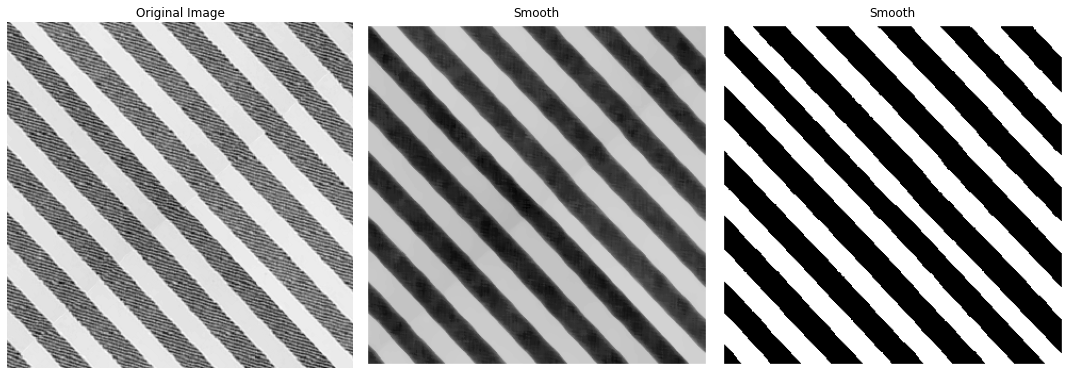

In [128]:
img_ex1 = cv2.imread("Figuras_APS2/Fig1_Tecido5.bmp", cv2.IMREAD_GRAYSCALE)
(h, w) = img_ex1.shape

m = 9
d= int((m-1)/2)

img_filter=np.full((h,w),255,dtype = "uint8")

for i in range(d,h-d):
    for j in range (d,w-d):
        secao_img = img_ex1[i-d:i+d+1,j-d:j+d+1]
        img_filter[i,j]=np.median(secao_img)

ex1_bin = np.where(img_filter < 205, 0, 255).astype(np.uint8)


plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(img_ex1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_filter, cmap='gray')
plt.title('Smooth')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(ex1_bin, cmap='gray')
plt.title('Smooth')
plt.axis('off')

plt.tight_layout()
plt.show()

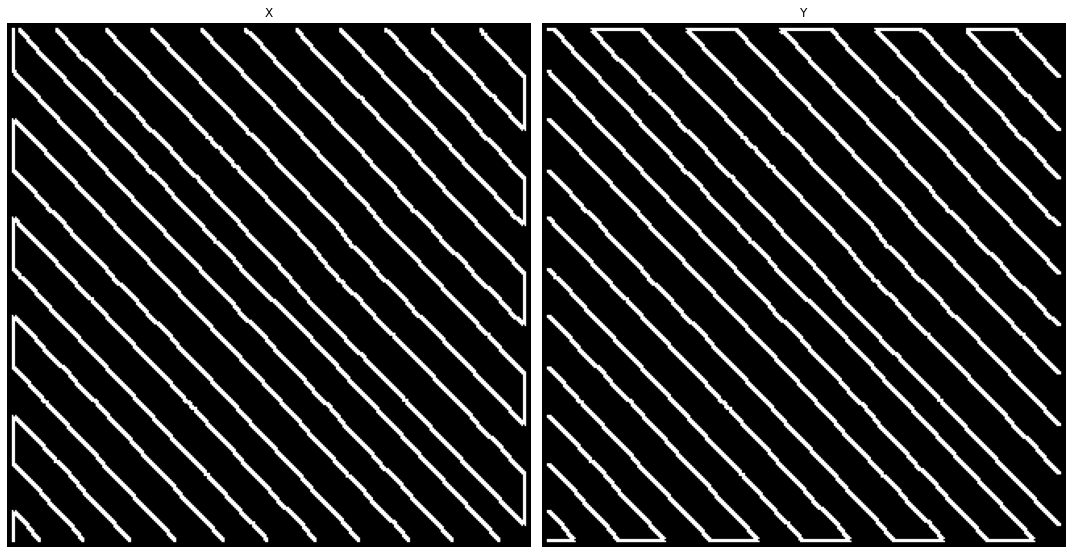

In [129]:
m = 3
d= int((m-1)/2)
kernel_Y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype="int16")
kernel_X = np.array([[1,0,-1],[1,0,-1],[1,0,-1]],dtype="int16")

img_filter_X=np.zeros((h,w),dtype = "uint8")
img_filter_Y=np.zeros((h,w),dtype = "uint8")

for i in range(d,h-d):
    for j in range (d,w-d):
        secao_img = ex1_bin[i-d:i+d+1,j-d:j+d+1]

        product =kernel_X*secao_img
        sum = product.sum()
        img_filter_X[i,j]= abs(sum).astype("uint8")
        
        product2 =kernel_Y*secao_img
        sum2 = product2.sum()
        img_filter_Y[i,j]= abs(sum2).astype("uint8")

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img_filter_X, cmap='gray')
plt.title('X')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_filter_Y, cmap='gray')
plt.title('Y')
plt.axis('off')


plt.tight_layout()
plt.show()

In [130]:
Vertical = 0
Horizontal = 0

for i in range(h):
    for j in range (w):
        if img_filter_X[i,j]>0:
            Vertical+=1
for i in range(h):
    for j in range (w):
        if img_filter_Y[i,j]>0:
            Horizontal+=1

indicador =Vertical-Horizontal
print(indicador)
if indicador<-2000:
    print("Horizontal")
elif indicador>=-2000 and indicador<2000:
    print("Diagonal")
else:
    print("Vertical")

18
Diagonal
